In [1]:
# importing libraries
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
import seaborn as sns
sns.set()
from matplotlib import pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.cluster import KMeans
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


%matplotlib inline

In [2]:
# reading data
data=pd.read_csv("/content/data.csv")
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11914 entries, 0 to 11913
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Make               11914 non-null  object 
 1   Model              11914 non-null  object 
 2   Year               11914 non-null  int64  
 3   Engine Fuel Type   11911 non-null  object 
 4   Engine HP          11845 non-null  float64
 5   Engine Cylinders   11884 non-null  float64
 6   Transmission Type  11914 non-null  object 
 7   Driven_Wheels      11914 non-null  object 
 8   Number of Doors    11908 non-null  float64
 9   Market Category    8172 non-null   object 
 10  Vehicle Size       11914 non-null  object 
 11  Vehicle Style      11914 non-null  object 
 12  highway MPG        11914 non-null  int64  
 13  city mpg           11914 non-null  int64  
 14  Popularity         11914 non-null  int64  
 15  MSRP               11914 non-null  int64  
dtypes: float64(3), int64(5

In [3]:
data.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


In [4]:
data.shape

(11914, 16)

In [5]:
#check if there is null values help us to hundle missing values in training phases
data.isnull().sum()

Make                    0
Model                   0
Year                    0
Engine Fuel Type        3
Engine HP              69
Engine Cylinders       30
Transmission Type       0
Driven_Wheels           0
Number of Doors         6
Market Category      3742
Vehicle Size            0
Vehicle Style           0
highway MPG             0
city mpg                0
Popularity              0
MSRP                    0
dtype: int64

In [6]:
data.duplicated().sum()

715

In [ ]:
# scaler = MinMaxScaler()
# data[['engine_hp', 'popularity']] = scaler.fit_transform(data[['engine_hp', 'popularity']])

In [ ]:


# pca = PCA(n_components=2)
# data_reduced = pca.fit_transform(data)


In [7]:
data

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11909,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,46120
11910,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,56670
11911,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,50620
11912,Acura,ZDX,2013,premium unleaded (recommended),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,50920


In [8]:
#cleaning data =editing in dataset
data.columns=data.columns.str.lower().str.replace(' ','_')

stringColumns=list(data.dtypes[data.dtypes=='object'].index)

for col in stringColumns:
  data[col]=data[col].str.lower().str.replace(' ','_')

In [9]:
#change column name msrp to price
data.rename(columns = {'msrp': 'price'}, inplace = True)

In [97]:
#2 floating point after (,)
pd.options.display.float_format='{:,.2f}'.format
data.describe()

,year,engine_hp,engine_cylinders,number_of_doors,highway_mpg,city_mpg,popularity,price,log_price
count,"11,914.00","11,845.00","11,884.00","11,908.00","11,914.00","11,914.00","11,914.00","11,914.00","11,914.00"
mean,"2,010.38",249.39,5.63,3.44,26.64,19.73,"1,554.91","40,594.74",10.11
std,7.58,109.19,1.78,0.88,8.86,8.99,"1,441.86","60,109.10",1.11
min,"1,990.00",55.00,0.00,2.00,12.00,7.00,2.00,"2,000.00",7.60
25%,"2,007.00",170.00,4.00,2.00,22.00,16.00,549.00,"21,000.00",9.95
50%,"2,015.00",227.00,6.00,4.00,26.00,18.00,"1,385.00","29,995.00",10.31
75%,"2,016.00",300.00,6.00,4.00,30.00,22.00,"2,009.00","42,231.25",10.65
max,"2,017.00","1,001.00",16.00,4.00,354.00,137.00,"5,657.00","2,065,902.00",14.54


In [11]:
data

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,price
0,bmw,1_series_m,2011,premium_unleaded_(required),335.00,6.00,manual,rear_wheel_drive,2.00,"factory_tuner,luxury,high-performance",compact,coupe,26,19,3916,46135
1,bmw,1_series,2011,premium_unleaded_(required),300.00,6.00,manual,rear_wheel_drive,2.00,"luxury,performance",compact,convertible,28,19,3916,40650
2,bmw,1_series,2011,premium_unleaded_(required),300.00,6.00,manual,rear_wheel_drive,2.00,"luxury,high-performance",compact,coupe,28,20,3916,36350
3,bmw,1_series,2011,premium_unleaded_(required),230.00,6.00,manual,rear_wheel_drive,2.00,"luxury,performance",compact,coupe,28,18,3916,29450
4,bmw,1_series,2011,premium_unleaded_(required),230.00,6.00,manual,rear_wheel_drive,2.00,luxury,compact,convertible,28,18,3916,34500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11909,acura,zdx,2012,premium_unleaded_(required),300.00,6.00,automatic,all_wheel_drive,4.00,"crossover,hatchback,luxury",midsize,4dr_hatchback,23,16,204,46120
11910,acura,zdx,2012,premium_unleaded_(required),300.00,6.00,automatic,all_wheel_drive,4.00,"crossover,hatchback,luxury",midsize,4dr_hatchback,23,16,204,56670
11911,acura,zdx,2012,premium_unleaded_(required),300.00,6.00,automatic,all_wheel_drive,4.00,"crossover,hatchback,luxury",midsize,4dr_hatchback,23,16,204,50620
11912,acura,zdx,2013,premium_unleaded_(recommended),300.00,6.00,automatic,all_wheel_drive,4.00,"crossover,hatchback,luxury",midsize,4dr_hatchback,23,16,204,50920


In [12]:
#suppose we want to count number of cars in make column
data.make.value_counts()

make
chevrolet        1123
ford              881
volkswagen        809
toyota            746
dodge             626
nissan            558
gmc               515
honda             449
mazda             423
cadillac          397
mercedes-benz     353
suzuki            351
bmw               334
infiniti          330
audi              328
hyundai           303
volvo             281
subaru            256
acura             252
kia               231
mitsubishi        213
lexus             202
buick             196
chrysler          187
pontiac           186
lincoln           164
oldsmobile        150
land_rover        143
porsche           136
saab              111
aston_martin       93
plymouth           82
bentley            74
ferrari            69
fiat               62
scion              60
maserati           58
lamborghini        52
rolls-royce        31
lotus              29
tesla              18
hummer             17
maybach            16
alfa_romeo          5
mclaren             5
spyke

In [13]:
#calc the average price in price column after year >2015
data[data['year'] >= 2015]['price'].mean()

45667.156463719766

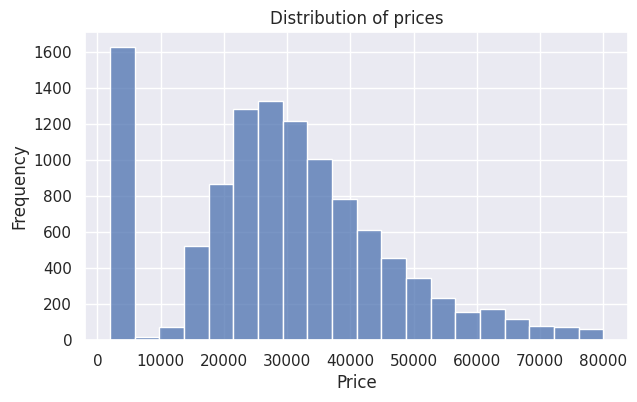

In [14]:
#Visualization of data
plt.figure(figsize=(7, 4))

sns.histplot(data.price[data.price < 80000], bins=20)
plt.ylabel('Frequency')
plt.xlabel('Price')
plt.title('Distribution of prices')

plt.show()



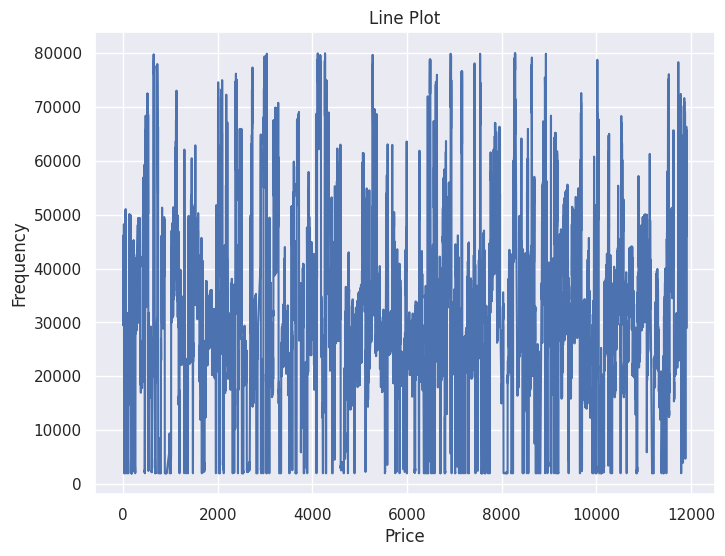

In [15]:
# Example line plot
plt.figure(figsize=(8, 6))
sns.lineplot(data.price[data.price < 80000])
plt.title('Line Plot')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()


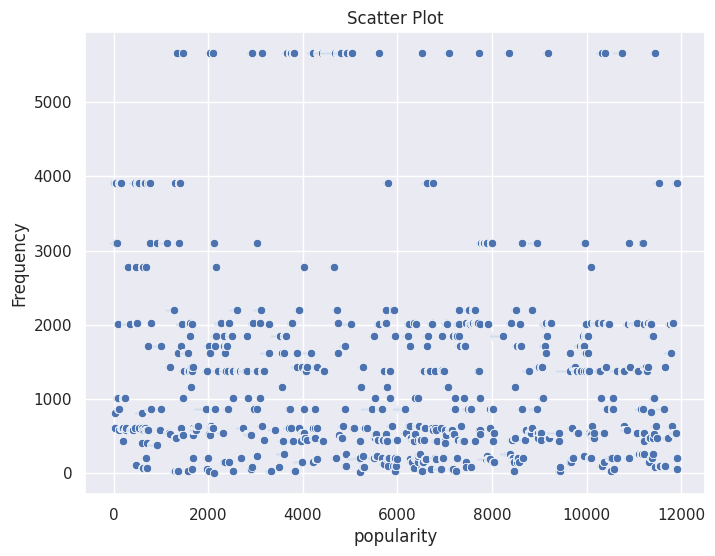

In [16]:
# Example scatter plot
plt.figure(figsize=(8, 6))
sns.scatterplot(data.popularity)
plt.title('Scatter Plot')
plt.xlabel('popularity')
plt.ylabel('Frequency')
plt.show()

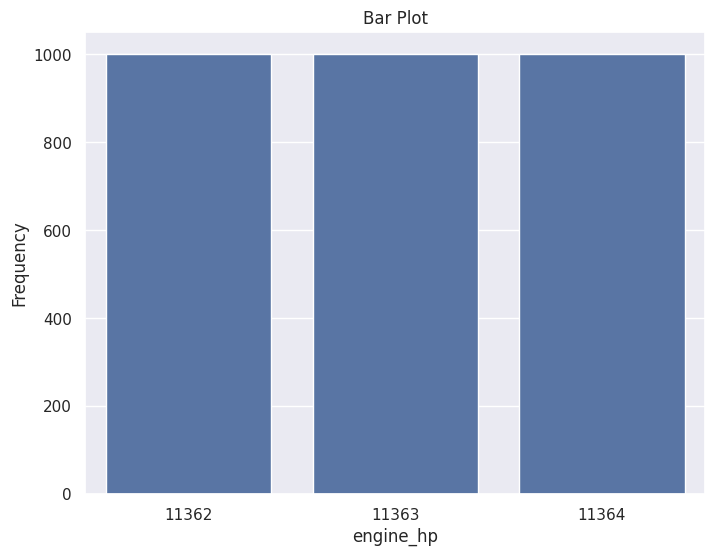

In [17]:
plt.figure(figsize=(8, 6))
sns.barplot(data.engine_hp[data.engine_hp >800])
plt.title('Bar Plot')
plt.xlabel('engine_hp')
plt.ylabel('Frequency')
plt.show()

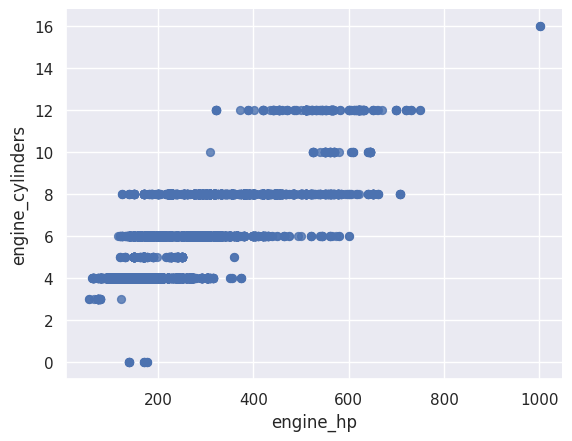

In [96]:
# @title engine_hp vs engine_cylinders

from matplotlib import pyplot as plt
data.plot(kind='scatter', x='engine_hp', y='engine_cylinders', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

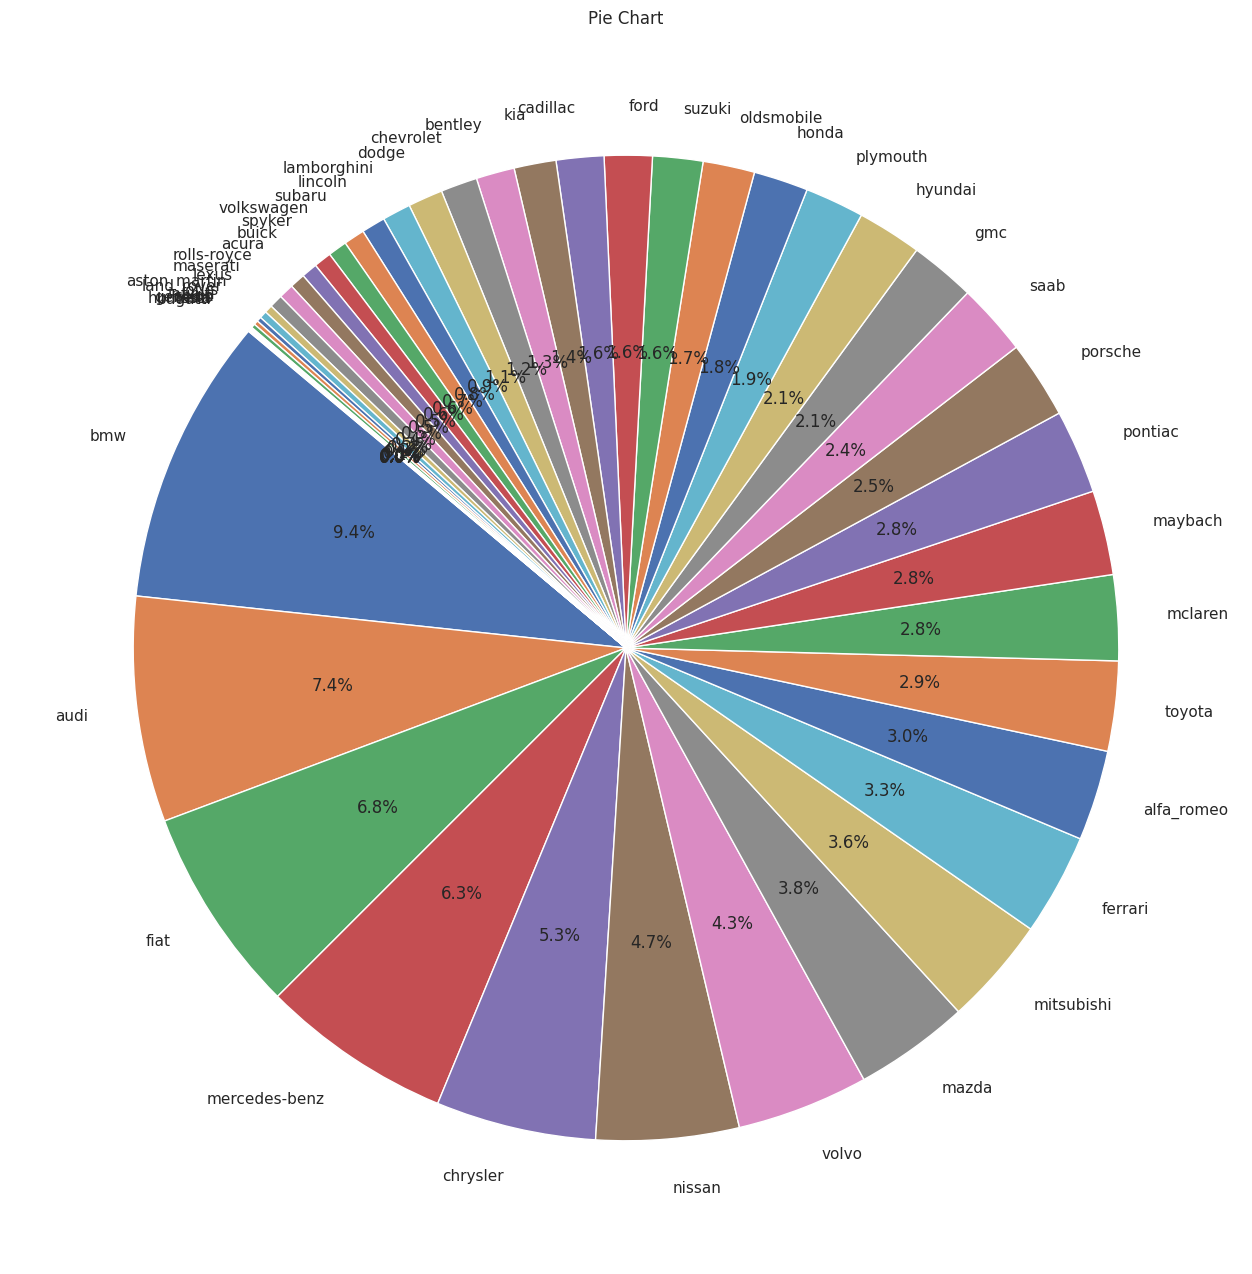

In [19]:
plt.figure(figsize=(18, 16))
plt.pie(data['make'].value_counts(), labels=data['make'].unique(), autopct='%1.1f%%', startangle=140)
plt.title('Pie Chart')
plt.show()

<ipython-input-20-3edeccc76224>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data, x='year', y='vehicle_size', inner='box', palette='Dark2')


<Axes: xlabel='year', ylabel='vehicle_size'>

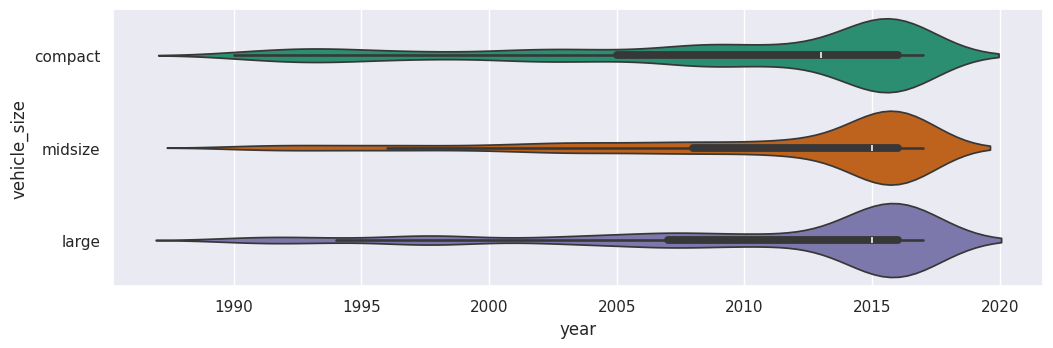

In [20]:
figsize = (12, 1.2 * len(data['vehicle_size'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(data, x='year', y='vehicle_size', inner='box', palette='Dark2')

# sns.despine(top=True, right=True, bottom=True, left=True)

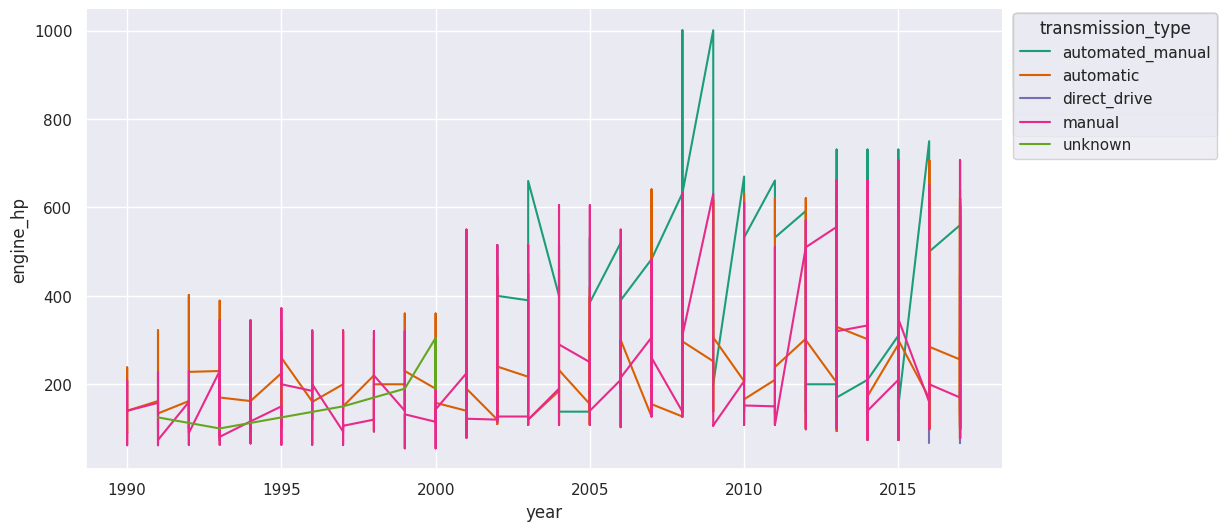

In [32]:
# @title year vs engine_hp

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['year']
  ys = series['engine_hp']

  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = df_shuffled.sort_values('year', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('transmission_type')):
  _plot_series(series, series_name, i)
  fig.legend(title='transmission_type', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('year')
_ = plt.ylabel('engine_hp')

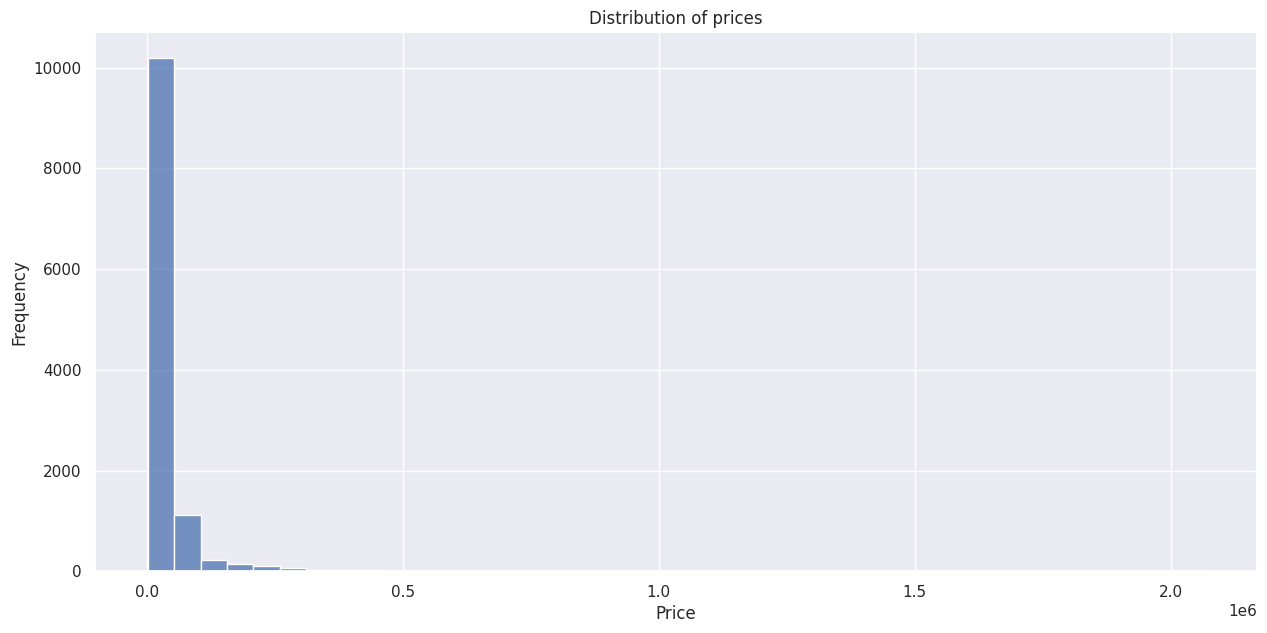

In [22]:
plt.figure(figsize=(15, 7))

sns.histplot(data.price, bins=40)
plt.ylabel('Frequency')
plt.xlabel('Price')
plt.title('Distribution of prices')

plt.show()
#problem!!!!!

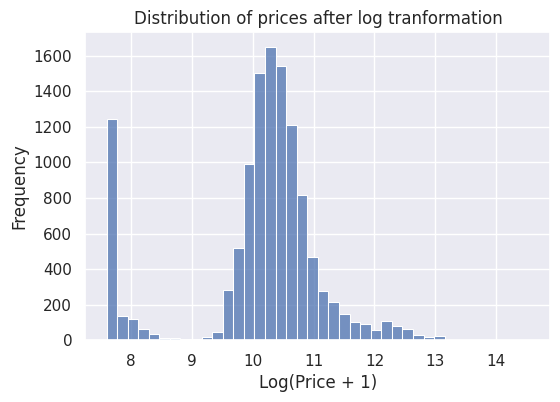

In [23]:
data['log_price'] = np.log1p(data.price)

plt.figure(figsize=(6, 4))

sns.histplot(data.log_price, bins=40)
plt.ylabel('Frequency')
plt.xlabel('Log(Price + 1)')
plt.title('Distribution of prices after log tranformation')

plt.show()
#normal Distribution

In [24]:
data.price.skew()

11.771987129334972

In [25]:
data.log_price.skew()

-0.9178678067039072

In [ ]:
#start Validation

In [26]:
np.random.seed(2)     # Fixes the random seed to make sure that the results are reproducible

n = len(data)

n_val = int(0.2 * n)
n_test = int(0.2 * n)
n_train = n - (n_val + n_test)

print('No. of rows for training : ', n_train)
print('No. of rows for validation : ', n_val)
print('No. of rows for testing : ', n_test)

No. of rows for training :  7150
No. of rows for validation :  2382
No. of rows for testing :  2382


In [27]:
idx = np.arange(n)
print(idx)
np.random.shuffle(idx)
print(idx)

[    0     1     2 ... 11911 11912 11913]
[2735 6720 5878 ... 6637 2575 7336]


In [28]:
df_shuffled = data.iloc[idx]
print(data.index)
print(df_shuffled.index)

RangeIndex(start=0, stop=11914, step=1)
Index([ 2735,  6720,  5878, 11190,  4554,  8001,  2882,   649,   616,  4459,
       ...
        6751,   433,  4770, 11527,  1099,  2514, 11798,  6637,  2575,  7336],
      dtype='int64', length=11914)


In [29]:
df_shuffled

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,price,log_price
2735,chevrolet,cobalt,2008,regular_unleaded,148.00,4.00,manual,front_wheel_drive,2.00,NaN,compact,coupe,33,24,1385,14410,9.58
6720,toyota,matrix,2012,regular_unleaded,132.00,4.00,automatic,front_wheel_drive,4.00,hatchback,compact,4dr_hatchback,32,25,2031,19685,9.89
5878,subaru,impreza,2016,regular_unleaded,148.00,4.00,automatic,all_wheel_drive,4.00,hatchback,compact,4dr_hatchback,37,28,640,19795,9.89
11190,volkswagen,vanagon,1991,regular_unleaded,90.00,4.00,manual,rear_wheel_drive,3.00,NaN,large,passenger_minivan,18,16,873,2000,7.60
4554,ford,f-150,2017,flex-fuel_(unleaded/e85),385.00,8.00,automatic,four_wheel_drive,4.00,flex_fuel,large,crew_cab_pickup,21,15,5657,56260,10.94
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2514,chevrolet,chevy_van,1998,regular_unleaded,200.00,6.00,automatic,rear_wheel_drive,3.00,NaN,midsize,cargo_van,18,13,1385,2052,7.63
11798,subaru,xv_crosstrek,2014,regular_unleaded,160.00,4.00,automatic,all_wheel_drive,4.00,"crossover,hybrid",compact,4dr_suv,33,29,640,25995,10.17
6637,dodge,magnum,2006,regular_unleaded,250.00,6.00,automatic,all_wheel_drive,4.00,NaN,large,wagon,22,15,1851,29100,10.28
2575,honda,civic,2016,regular_unleaded,174.00,4.00,automatic,front_wheel_drive,4.00,NaN,midsize,sedan,42,31,2202,22200,10.01


In [30]:
data

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,price,log_price
0,bmw,1_series_m,2011,premium_unleaded_(required),335.00,6.00,manual,rear_wheel_drive,2.00,"factory_tuner,luxury,high-performance",compact,coupe,26,19,3916,46135,10.74
1,bmw,1_series,2011,premium_unleaded_(required),300.00,6.00,manual,rear_wheel_drive,2.00,"luxury,performance",compact,convertible,28,19,3916,40650,10.61
2,bmw,1_series,2011,premium_unleaded_(required),300.00,6.00,manual,rear_wheel_drive,2.00,"luxury,high-performance",compact,coupe,28,20,3916,36350,10.50
3,bmw,1_series,2011,premium_unleaded_(required),230.00,6.00,manual,rear_wheel_drive,2.00,"luxury,performance",compact,coupe,28,18,3916,29450,10.29
4,bmw,1_series,2011,premium_unleaded_(required),230.00,6.00,manual,rear_wheel_drive,2.00,luxury,compact,convertible,28,18,3916,34500,10.45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11909,acura,zdx,2012,premium_unleaded_(required),300.00,6.00,automatic,all_wheel_drive,4.00,"crossover,hatchback,luxury",midsize,4dr_hatchback,23,16,204,46120,10.74
11910,acura,zdx,2012,premium_unleaded_(required),300.00,6.00,automatic,all_wheel_drive,4.00,"crossover,hatchback,luxury",midsize,4dr_hatchback,23,16,204,56670,10.95
11911,acura,zdx,2012,premium_unleaded_(required),300.00,6.00,automatic,all_wheel_drive,4.00,"crossover,hatchback,luxury",midsize,4dr_hatchback,23,16,204,50620,10.83
11912,acura,zdx,2013,premium_unleaded_(recommended),300.00,6.00,automatic,all_wheel_drive,4.00,"crossover,hatchback,luxury",midsize,4dr_hatchback,23,16,204,50920,10.84


In [33]:
df_train = df_shuffled.iloc[:n_train].copy()
df_val = df_shuffled.iloc[n_train:n_train+n_val].copy()
df_test = df_shuffled.iloc[n_train+n_val:].copy()

In [34]:
df_train.shape

(7150, 17)

In [35]:
df_val.shape

(2382, 17)

In [36]:
df_test.shape

(2382, 17)

In [37]:
#split target
y_train = df_train.log_price.values
y_val = df_val.log_price.values
y_test = df_test.log_price.values


In [38]:
#Baseline Solution
base = ['engine_hp', 'engine_cylinders', 'highway_mpg', 'city_mpg', 'popularity']   # Think about Numerical only

In [39]:
data[base]

,engine_hp,engine_cylinders,highway_mpg,city_mpg,popularity
0,335.00,6.00,26,19,3916
1,300.00,6.00,28,19,3916
2,300.00,6.00,28,20,3916
3,230.00,6.00,28,18,3916
4,230.00,6.00,28,18,3916
...,...,...,...,...,...
11909,300.00,6.00,23,16,204
11910,300.00,6.00,23,16,204
11911,300.00,6.00,23,16,204
11912,300.00,6.00,23,16,204


In [40]:
data[base].isnull().sum()

engine_hp           69
engine_cylinders    30
highway_mpg          0
city_mpg             0
popularity           0
dtype: int64

In [41]:
#function to Handling Missing Values
def prepare_X(data):
    data_num = data[base]
    data_num = data_num.fillna(data_num.mean())
    X = data_num.values
    return X

In [42]:
def linear_regression(xi):
    n =len(xi)                # Number of features used

    pred = w0                 # Initial / Base prediction

    for j in range(n):
        pred += w[j]*xi[j]     # Formula = w0 +sigma[0:n-1]{w[j]*xi[j]}

    return pred

In [43]:
def train_linear_regression(X, y):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    XTX_inv = np.linalg.inv(XTX)
    w = XTX_inv.dot(X.T).dot(y)

    return w[0], w[1:]

In [44]:
X_train = prepare_X(df_train)
w_0, w = train_linear_regression(X_train, y_train)
y_pred = w_0 + X_train.dot(w)

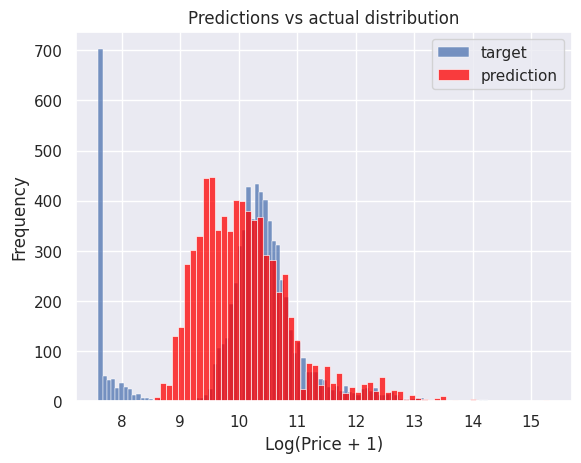

In [45]:
sns.histplot(y_train, label='target')
sns.histplot(y_pred, label='prediction', color='red')

plt.legend()

plt.ylabel('Frequency')
plt.xlabel('Log(Price + 1)')
plt.title('Predictions vs actual distribution')

plt.show()

In [46]:
def rmse(y, y_pred):
    error = y_pred - y
    mse = (error ** 2).mean()
    return np.sqrt(mse)

In [47]:
rmse(y_train, y_pred)

0.7574439819012008

In [48]:
X_val = prepare_X(df_val)
y_pred = w_0 + X_val.dot(w)

In [49]:
rmse(y_val, y_pred)

0.7502502346381938

In [50]:
#feature Engineering
sorted(data.year.unique())

[1990,
 1991,
 1992,
 1993,
 1994,
 1995,
 1996,
 1997,
 1998,
 1999,
 2000,
 2001,
 2002,
 2003,
 2004,
 2005,
 2006,
 2007,
 2008,
 2009,
 2010,
 2011,
 2012,
 2013,
 2014,
 2015,
 2016,
 2017]

In [51]:
def prepare_X(df):
    df = df.copy()
    features = base.copy()

    df['age'] = 2017 - df.year    # Because the dataset was created in 2017 (which we can verify by checking df_train.year.max())
    features.append('age')

    df_num = df[features]
    df_num = df_num.fillna(df_num.mean())
    X = df_num.values
    return X

In [52]:
X_train = prepare_X(df_train)
w_0, w = train_linear_regression(X_train, y_train)
y_pred = w_0 + X_train.dot(w)
print('Train RMSE: ', rmse(y_train, y_pred))

X_val = prepare_X(df_val)
y_pred = w_0 + X_val.dot(w)
print('Validation RMSE: ', rmse(y_val, y_pred))

Train RMSE:  0.5117454503079418
Validation RMSE:  0.5070033906013028


In [53]:
#Handling Categorical Variables(oneHotEncoding)
data.number_of_doors.value_counts()

number_of_doors
4.00    8353
2.00    3160
3.00     395
Name: count, dtype: int64

In [54]:
data['make'].unique()

array(['bmw', 'audi', 'fiat', 'mercedes-benz', 'chrysler', 'nissan',
       'volvo', 'mazda', 'mitsubishi', 'ferrari', 'alfa_romeo', 'toyota',
       'mclaren', 'maybach', 'pontiac', 'porsche', 'saab', 'gmc',
       'hyundai', 'plymouth', 'honda', 'oldsmobile', 'suzuki', 'ford',
       'cadillac', 'kia', 'bentley', 'chevrolet', 'dodge', 'lamborghini',
       'lincoln', 'subaru', 'volkswagen', 'spyker', 'buick', 'acura',
       'rolls-royce', 'maserati', 'lexus', 'aston_martin', 'land_rover',
       'lotus', 'infiniti', 'scion', 'genesis', 'hummer', 'tesla',
       'bugatti'], dtype=object)

In [55]:
data['make'].value_counts().head(5)

make
chevrolet     1123
ford           881
volkswagen     809
toyota         746
dodge          626
Name: count, dtype: int64

In [56]:
def prepare_X(df):
    df = df.copy()
    features = base.copy()

    df['age'] = 2017 - df.year
    features.append('age')

    for v in [2, 3, 4]:
        feature = 'num_doors_%s' % v
        df[feature] = (df['number_of_doors'] == v).astype(int)
        features.append(feature)

    for v in ['chevrolet', 'ford', 'volkswagen', 'toyota', 'dodge']:
        feature = 'is_make_%s' % v
        df[feature] = (df['make'] == v).astype(int)
        features.append(feature)

    df_num = df[features]
    df_num = df_num.fillna(df_num.mean())
    X = df_num.values
    return X

In [57]:
X_train = prepare_X(df_train)
w_0, w = train_linear_regression(X_train, y_train)

y_pred = w_0 + X_train.dot(w)
print('train:', rmse(y_train, y_pred))

X_val = prepare_X(df_val)
y_pred = w_0 + X_val.dot(w)
print('validation:', rmse(y_val, y_pred))

train: 0.5010764007201611
validation: 0.4982643557277196


In [58]:
data['engine_fuel_type'].value_counts().head(4)

engine_fuel_type
regular_unleaded                  7172
premium_unleaded_(required)       2009
premium_unleaded_(recommended)    1523
flex-fuel_(unleaded/e85)           899
Name: count, dtype: int64

In [59]:
def prepare_X(df):
    df = df.copy()
    features = base.copy()

    df['age'] = 2017 - df.year
    features.append('age')

    for v in [2, 3, 4]:
        feature = 'num_doors_%s' % v
        df[feature] = (df['number_of_doors'] == v).astype(int)
        features.append(feature)

    for v in ['chevrolet', 'ford', 'volkswagen', 'toyota', 'dodge']:
        feature = 'is_make_%s' % v
        df[feature] = (df['make'] == v).astype(int) #add to this feature new column in df
        features.append(feature)

    for v in ['regular_unleaded', 'premium_unleaded_(required)',
              'premium_unleaded_(recommended)', 'flex-fuel_(unleaded/e85)']:
        feature = 'is_type_%s' % v
        df[feature] = (df['engine_fuel_type'] == v).astype(int)
        features.append(feature)

    df_num = df[features]
    df_num = df_num.fillna(0)
    X = df_num.values
    return X

In [60]:
X_train = prepare_X(df_train)
w_0, w = train_linear_regression(X_train, y_train)

y_pred = w_0 + X_train.dot(w)
print('train:', rmse(y_train, y_pred))

X_val = prepare_X(df_val)
y_pred = w_0 + X_val.dot(w)
print('validation:', rmse(y_val, y_pred))

train: 0.4788482615078598
validation: 0.4748256737223095


In [61]:
data['transmission_type'].value_counts()

transmission_type
automatic           8266
manual              2935
automated_manual     626
direct_drive          68
unknown               19
Name: count, dtype: int64

In [62]:
data['driven_wheels'].value_counts()

driven_wheels
front_wheel_drive    4787
rear_wheel_drive     3371
all_wheel_drive      2353
four_wheel_drive     1403
Name: count, dtype: int64

In [63]:
data['market_category'].value_counts().head(5)

market_category
crossover             1110
flex_fuel              872
luxury                 855
luxury,performance     673
hatchback              641
Name: count, dtype: int64

In [64]:
data['vehicle_size'].value_counts().head(5)

vehicle_size
compact    4764
midsize    4373
large      2777
Name: count, dtype: int64

In [65]:
data['vehicle_style'].value_counts().head(5)

vehicle_style
sedan            3048
4dr_suv          2488
coupe            1211
convertible       793
4dr_hatchback     702
Name: count, dtype: int64

In [66]:
def prepare_X(df):
    df = df.copy()
    features = base.copy()

    df['age'] = 2017 - df.year
    features.append('age')

    for v in [2, 3, 4]:
        feature = 'num_doors_%s' % v
        df[feature] = (df['number_of_doors'] == v).astype(int)
        features.append(feature)

    for v in ['chevrolet', 'ford', 'volkswagen', 'toyota', 'dodge']:
        feature = 'is_make_%s' % v
        df[feature] = (df['make'] == v).astype(int)
        features.append(feature)

    for v in ['regular_unleaded', 'premium_unleaded_(required)',
              'premium_unleaded_(recommended)', 'flex-fuel_(unleaded/e85)']:
        feature = 'is_type_%s' % v
        df[feature] = (df['engine_fuel_type'] == v).astype(int)
        features.append(feature)

    for v in ['automatic', 'manual', 'automated_manual']:
        feature = 'is_transmission_%s' % v
        df[feature] = (df['transmission_type'] == v).astype(int)
        features.append(feature)

    df_num = df[features]
    df_num = df_num.fillna(df_num.mean())
    X = df_num.values
    return X

In [67]:
X_train = prepare_X(df_train)
w_0, w = train_linear_regression(X_train, y_train)

y_pred = w_0 + X_train.dot(w)
print('train:', rmse(y_train, y_pred))

X_val = prepare_X(df_val)
y_pred = w_0 + X_val.dot(w)
print('validation:', rmse(y_val, y_pred))

train: 0.47227213583716005
validation: 0.4653694386689132


In [68]:
def prepare_X(df):
    df = df.copy()
    features = base.copy()

    df['age'] = 2017 - df.year
    features.append('age')

    for v in [2, 3, 4]:
        feature = 'num_doors_%s' % v
        df[feature] = (df['number_of_doors'] == v).astype(int)
        features.append(feature)

    for v in ['chevrolet', 'ford', 'volkswagen', 'toyota', 'dodge']:
        feature = 'is_make_%s' % v
        df[feature] = (df['make'] == v).astype(int)
        features.append(feature)

    for v in ['regular_unleaded', 'premium_unleaded_(required)',
              'premium_unleaded_(recommended)', 'flex-fuel_(unleaded/e85)']:
        feature = 'is_type_%s' % v
        df[feature] = (df['engine_fuel_type'] == v).astype(int)
        features.append(feature)

    for v in ['automatic', 'manual', 'automated_manual']:
        feature = 'is_transmission_%s' % v
        df[feature] = (df['transmission_type'] == v).astype(int)
        features.append(feature)

    for v in ['front_wheel_drive', 'rear_wheel_drive', 'all_wheel_drive', 'four_wheel_drive']:
        feature = 'is_driven_wheels_%s' % v
        df[feature] = (df['driven_wheels'] == v).astype(int)
        features.append(feature)

    for v in ['crossover', 'flex_fuel', 'luxury', 'luxury,performance', 'hatchback']:
        feature = 'is_mc_%s' % v
        df[feature] = (df['market_category'] == v).astype(int)
        features.append(feature)

    for v in ['compact', 'midsize', 'large']:
        feature = 'is_size_%s' % v
        df[feature] = (df['vehicle_size'] == v).astype(int)
        features.append(feature)

    for v in ['sedan', '4dr_suv', 'coupe', 'convertible', '4dr_hatchback']:
        feature = 'is_style_%s' % v
        df[feature] = (df['vehicle_style'] == v).astype(int)
        features.append(feature)

    df_num = df[features]
    df_num = df_num.fillna(df_num.mean())
    X = df_num.values
    return X

In [69]:
X_train = prepare_X(df_train)
w_0, w = train_linear_regression(X_train, y_train)

y_pred = w_0 + X_train.dot(w)
print('train:', rmse(y_train, y_pred))

X_val = prepare_X(df_val)
y_pred = w_0 + X_val.dot(w)
print('validation:', rmse(y_val, y_pred))

train: 2219.4977297377545
validation: 795.8906366825912


In [70]:
w_0         #linear combination search about singular maxtrix

7.744092494697691e+16

In [71]:
w.astype(int)

array([                 4,                133,                 83,
                       87,                  0,                 65,
                    76152,              76653,              76029,
                      -75,                -87,                296,
                     -181,                 64,               1753,
                     1499,               1645,               1882,
                     4513,               4348,               4323,
       -77440924947065216, -77440924947064944, -77440924947064576,
       -77440924947064240,                 55,                 79,
                      -71,               -204,               -280,
                     -455,               -243,               -329,
                        0,                  0,                  0,
                        0,                  0])

In [72]:
#Regularization
def train_linear_regression_reg(X, y, r=0.0):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    reg = r * np.eye(XTX.shape[0])
    XTX = XTX + reg

    XTX_inv = np.linalg.inv(XTX)
    w = XTX_inv.dot(X.T).dot(y)

    return w[0], w[1:]

In [73]:
X_train = prepare_X(df_train)

In [74]:
for r in [0, 0.001, 0.01, 0.1, 1, 10]:
    w_0, w = train_linear_regression_reg(X_train, y_train, r=r)
    print('%5s, %.2f, %.2f, %.2f' % (r, w_0, w[13], w[21]))

    0, 77440924946976912.00, 64.03, -77440924947065216.00
0.001, 6.96, -0.10, 1.76
 0.01, 6.95, -0.10, 1.76
  0.1, 6.82, -0.10, 1.73
    1, 6.04, -0.10, 1.52
   10, 4.32, -0.09, 1.07


In [75]:
X_train = prepare_X(df_train)
w_0, w = train_linear_regression_reg(X_train, y_train, r=0.0)

y_pred = w_0 + X_train.dot(w)
print('train', rmse(y_train, y_pred))

X_val = prepare_X(df_val)
y_pred = w_0 + X_val.dot(w)
print('val', rmse(y_val, y_pred))

train 2219.4977297377545
val 795.8906366825912


In [76]:
X_train = prepare_X(df_train)
w_0, w = train_linear_regression_reg(X_train, y_train, r=0.01)

y_pred = w_0 + X_train.dot(w)
print('train', rmse(y_train, y_pred))

X_val = prepare_X(df_val)
y_pred = w_0 + X_val.dot(w)
print('val', rmse(y_val, y_pred))

train 0.4623435462011015
val 0.45751588650897834


In [77]:
X_train = prepare_X(df_train)
X_val = prepare_X(df_val)

for r in [0.000001, 0.0001, 0.001, 0.01, 0.1, 1, 5, 10]:
    w_0, w = train_linear_regression_reg(X_train, y_train, r=r)
    y_pred = w_0 + X_val.dot(w)
    print('%6s' %r, rmse(y_val, y_pred))

 1e-06 0.4575028907820457
0.0001 0.45750330803786093
 0.001 0.4575044546350645
  0.01 0.45751588650897834
   0.1 0.4576325827677228
     1 0.4589046994756599
     5 0.46450155470605864
    10 0.4707849371630168


In [78]:
X_train = prepare_X(df_train)
w_0, w = train_linear_regression_reg(X_train, y_train, r=0.01)

X_val = prepare_X(df_val)
y_pred = w_0 + X_val.dot(w)
print('validation:', rmse(y_val, y_pred))

X_test = prepare_X(df_test)
y_pred = w_0 + X_test.dot(w)
print('test:', rmse(y_test, y_pred))

validation: 0.45751588650897834
test: 0.4546002212754332


In [79]:
i = 2
ad = df_test.iloc[i].to_dict()
ad

{'make': 'toyota',
 'model': 'venza',
 'year': 2013,
 'engine_fuel_type': 'regular_unleaded',
 'engine_hp': 268.0,
 'engine_cylinders': 6.0,
 'transmission_type': 'automatic',
 'driven_wheels': 'all_wheel_drive',
 'number_of_doors': 4.0,
 'market_category': 'crossover,performance',
 'vehicle_size': 'midsize',
 'vehicle_style': 'wagon',
 'highway_mpg': 25,
 'city_mpg': 18,
 'popularity': 2031,
 'price': 31120,
 'log_price': 10.345638111452145}

In [80]:
X_test = prepare_X(pd.DataFrame([ad]))
y_pred = w_0 + X_test.dot(w)
suggestion = np.expm1(y_pred)
suggestion

array([28468.75677144])

In [81]:
# KNN model with 5 neighbors
knn = KNeighborsRegressor(n_neighbors=5)

# Train the KNN model
knn.fit(X_train, y_train)

KNeighborsRegressor()

In [82]:
# Predict prices using KNN
y_pred_knn = knn.predict(X_val)

In [83]:
# Calculate RMSE for KNN
rmse_knn = rmse(y_val, y_pred_knn)
print('KNN validation RMSE:', rmse_knn)
print('Linear Regression validation RMSE:', rmse(y_val, y_pred))

KNN validation RMSE: 0.2869231734714046
Linear Regression validation RMSE: 1.0884917250223383


In [84]:
# Create a Decision Tree regressor
dt = DecisionTreeRegressor()

# Train the Decision Tree model
dt.fit(X_train, y_train)

DecisionTreeRegressor()

In [85]:
# Predict prices using Decision Tree
y_pred_dt = dt.predict(X_val)

In [86]:
# Calculate RMSE for Decision Tree
rmse_dt = rmse(y_val, y_pred_dt)
print('Decision Tree validation RMSE:', rmse_dt)

Decision Tree validation RMSE: 0.14397771010007213


In [87]:
# Create a Random Forest regressor
rf = RandomForestRegressor()

# Train the Random Forest model
rf.fit(X_train, y_train)

RandomForestRegressor()

In [88]:
# Predict prices using Random Forest
y_pred_rf = rf.predict(X_val)

In [89]:
# Calculate RMSE for Random Forest
rmse_rf = rmse(y_val, y_pred_rf)
print('Random Forest validation RMSE:', rmse_rf)

Random Forest validation RMSE: 0.11282556285205822


In [90]:
# Create an SVM regressor
svm = SVR()

# Train the SVM model
svm.fit(X_train, y_train)

SVR()

In [91]:
# Predict prices using SVM
y_pred_svm = svm.predict(X_val)

In [92]:
# Calculate RMSE for SVM
rmse_svm = rmse(y_val, y_pred_svm)
print('SVM validation RMSE:', rmse_svm)

SVM validation RMSE: 0.814098135782162


In [93]:
print('Linear Regression validation RMSE:', rmse(y_val, y_pred))
print('KNN validation RMSE:', rmse(y_val, y_pred_knn))
print('Decision Tree validation RMSE:', rmse_dt)
print('Random Forest validation RMSE:', rmse_rf)
print('SVM validation RMSE:', rmse_svm)

Linear Regression validation RMSE: 1.0884917250223383
KNN validation RMSE: 0.2869231734714046
Decision Tree validation RMSE: 0.14397771010007213
Random Forest validation RMSE: 0.11282556285205822
SVM validation RMSE: 0.814098135782162


In [94]:
y_pred = w_0 + X_test.dot(w)
mse = rmse(y_test, y_pred)
print('Test MSE:', mse)

Test MSE: 1.101227269844835


In [ ]:
# y_pred = w_0 + X_test.dot(w)
# mae = mean_absolute_error(y_test, y_pred)
# print('Test MAE:', mae)

In [ ]:
# y_pred = w_0 + X_test.dot(w)
# r2 = r2_score(y_test, y_pred)
# print('Test R²:', r2)

In [ ]:
# kmeans = KMeans(n_clusters=k)
# kmeans.fit(X_train)
# cluster_labels = kmeans.predict(X_val)